# Mod2 Project - Linear Regression Model

Second Notebook

## Data Analysis

In this notebook, we begin our data analysis. In it we: 


    a) show distributions
    b) confirm that outliers are removed
    c) beging to run hypothesis tests on features.

The goal is to create a model that can efficiently and accurately predict a players fourth year salary after arbitration.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.formula.api import ols
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.dummy import DummyRegressor
# from sklearn import linear_model
# from sklearn import metrics
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import random
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

# 
Below is the dataset created after extensive cleaning in the first notebook.

In [2]:
df = pd.read_csv('rookie.csv')
print(df.shape)
df.head()

(994, 71)


,Unnamed: 0,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,prim_pos
0,0,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.000000,145.666667,7.000000,19.000000,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333,1,0,1,0,0,0,0,1,0,R,P
1,1,abadfe01,1985.0,Fernando,Abad,235.0,74.0,2010-07-28,2019-09-28,0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.000000,127.666667,5.000000,17.000000,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000,0,1,0,0,0,0,0,1,0,L,P
2,2,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,R,2B
3,3,accarje01,1981.0,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,52.333333,2.333333,4.333333,0.0,0.0,0.0,11.0,166.000000,23.333333,4.333333,42.333333,2.666667,0.336667,5.652214,1.666667,1.333333,0.666667,232.000000,27.333333,24.666667,0.666667,2.000000,3.000000,1.716016,55.333333,17.666667,1,0,1,0,0,0,0,1,0,R,P
4,4,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,R,1B


# 
Some visualizations to show the distributions amongst the data

In [3]:
df.groupby('prim_pos').salary.max()

prim_pos
1B    15000000.0
2B     6000000.0
3B     6916667.0
C     12500000.0
OF    16083333.0
P     14000000.0
SS     6000000.0
Name: salary, dtype: float64

In [4]:
df.groupby('prim_pos').salary.mean()

prim_pos
1B    2.872115e+06
2B    1.917065e+06
3B    2.620109e+06
C     1.983812e+06
OF    2.684265e+06
P     2.314292e+06
SS    2.264286e+06
Name: salary, dtype: float64

# 
The distributions of salary differentiated by the primary position of a player.

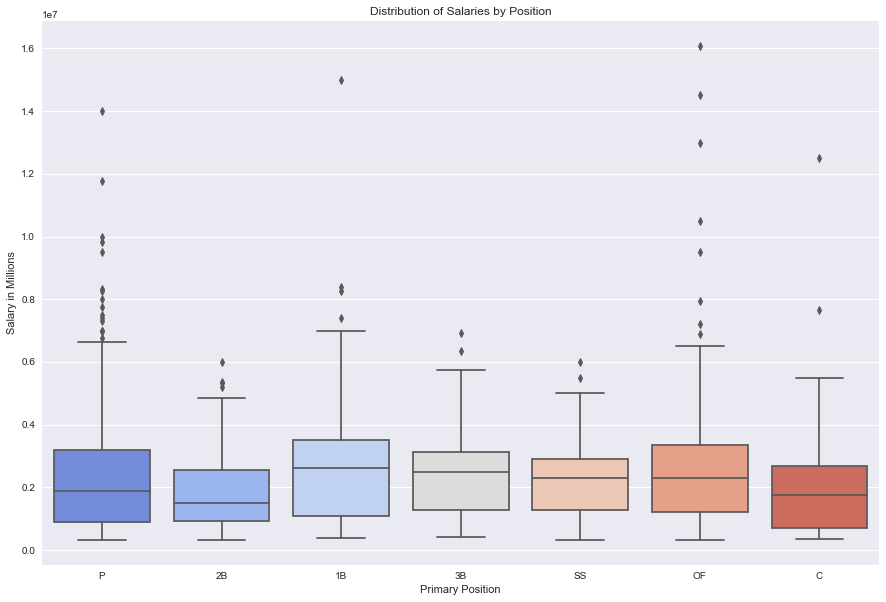

In [5]:
fig, axes = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'prim_pos', y = 'salary', data = df, palette='coolwarm')

axes.set_ylabel('Salary in Millions')
axes.set_xlabel('Primary Position')
axes.set_title('Distribution of Salaries by Position')

plt.savefig('PNG/sal_primpos.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

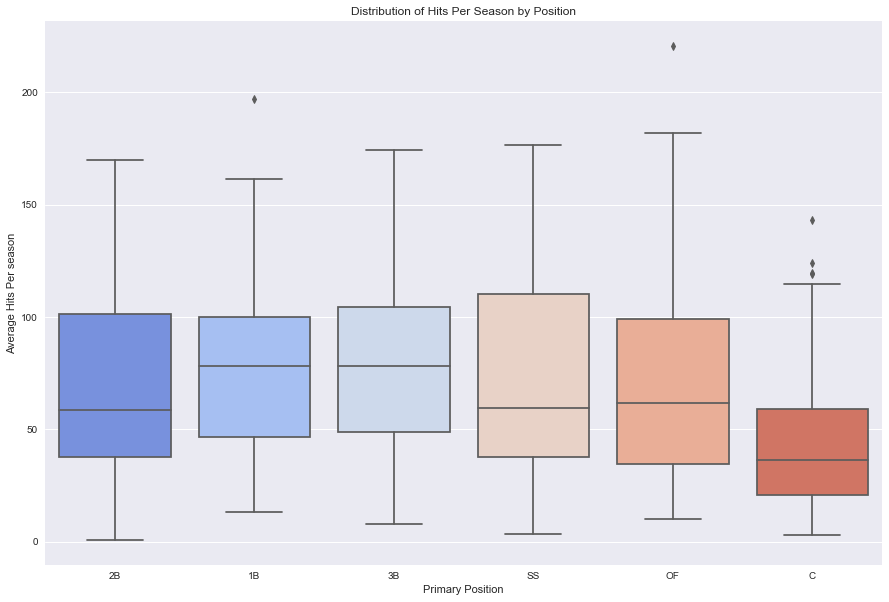

In [19]:
fig, axes = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'prim_pos', y = 'H', data = df[df['prim_pos']!='P'], palette='coolwarm')

axes.set_ylabel('Average Hits Per season')
axes.set_xlabel('Primary Position')
axes.set_title('Distribution of Hits Per Season by Position')

plt.savefig('PNG/hits_primpos.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

# 
In the two graphs below, you can see:
    
    a) The count of left handed batters is far smaller than the count of right handed batters
    b) The average salary is higher for a left handed batter

Why is that the case?

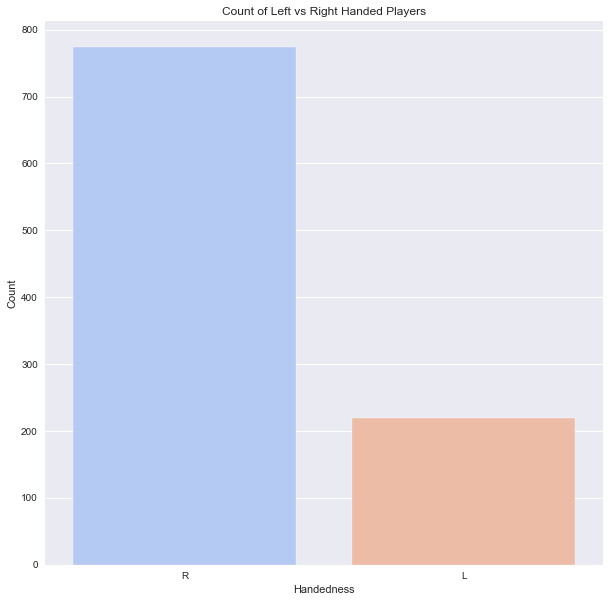

In [6]:

fig, axes = plt.subplots(figsize = (10,10))


sns.countplot(x= 'throws', data = df, palette = 'coolwarm')

axes.set_ylabel('Count')
axes.set_xlabel('Handedness')
axes.set_title('Count of Left vs Right Handed Players')


plt.savefig('PNG/right_left_play.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

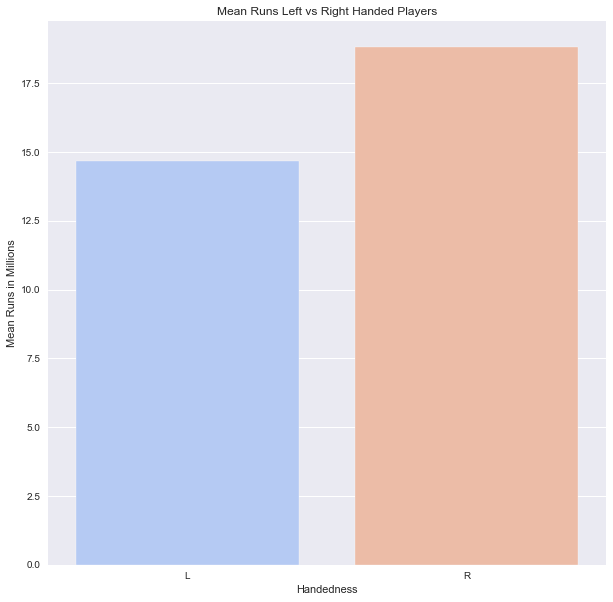

In [25]:
x = df.groupby('throws').R.mean().reset_index()


fig, axes = plt.subplots(figsize = (10,10))

sns.barplot(x= 'throws',y = 'R', data = x, palette='coolwarm')


axes.set_ylabel('Mean Runs in Millions')
axes.set_xlabel('Handedness')
axes.set_title('Mean Runs Left vs Right Handed Players')




plt.savefig('PNG/right_left_runs.png', dpi=300, 
          bbox_inches= 'tight', padding_inches = 4, transparent = True )

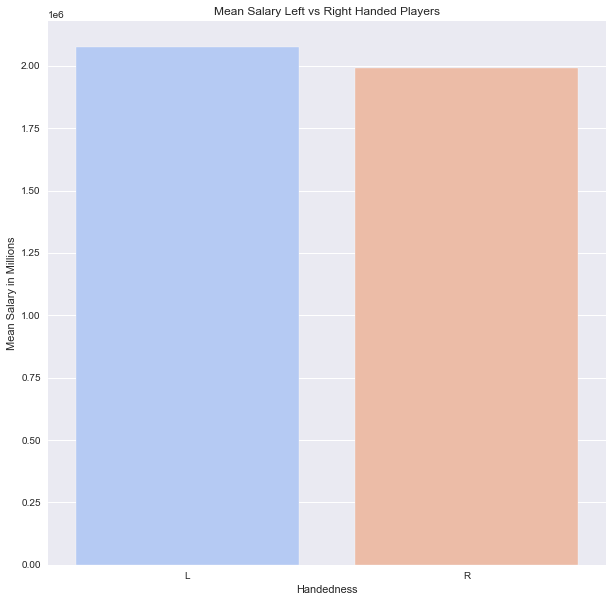

In [7]:
x = df.groupby('throws').salary.median().reset_index()


fig, axes = plt.subplots(figsize = (10,10))

sns.barplot(x= 'throws',y = 'salary', data = x, palette='coolwarm')


axes.set_ylabel('Mean Salary in Millions')
axes.set_xlabel('Handedness')
axes.set_title('Mean Salary Left vs Right Handed Players')



plt.savefig('PNG/right_left_meansal.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )


# The convention in baseball is that a pitcher has an advantage when thowing against someone who throws with the same hand.

In plainer terms, a lefty pitcher has an advantage against a left handed batter. The same is true with right handed pitchers. 

The higher average can be attributed to two things:

    a) the lack of sampling of left handed hitters shows bias in the data
    b) the rarity of left handed hitters and the prevalence of right handed pitchers make them a more precious commodity

In [8]:
df['throws'].value_counts()

R    774
L    220
Name: throws, dtype: int64

In [27]:
df['sal_log'] = np.log(df['salary'])

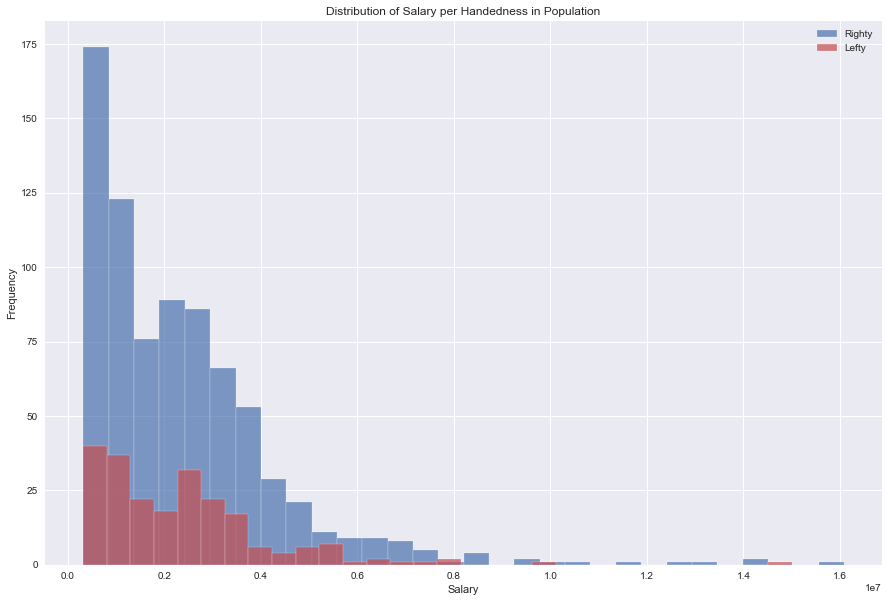

In [51]:
fig, ax = plt.subplots(figsize = (15,10))

df.salary[df.throws_R == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Righty")
df.salary[df.throws_R == 0].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Lefty", color = 'r')
plt.legend()
plt.title("Distribution of Salary per Handedness in Population")
plt.xlabel('Salary')
plt.savefig('PNG/hand_salary_dist.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

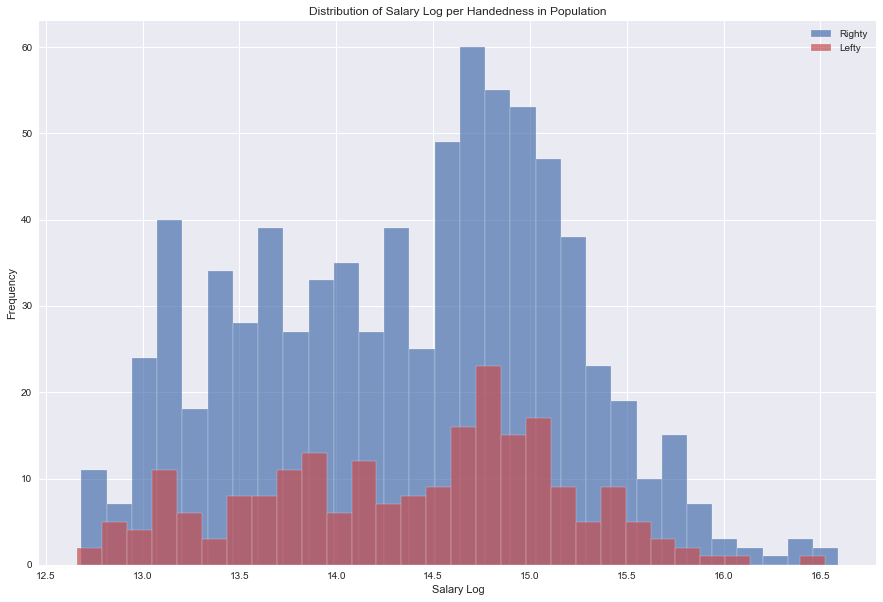

In [52]:
fig, ax = plt.subplots(figsize = (15,10))

df.sal_log[df.throws_R == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Righty")
df.sal_log[df.throws_R == 0].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Lefty", color = 'r')
plt.legend()
plt.title("Distribution of Salary Log per Handedness in Population")
plt.xlabel('Salary Log')
plt.savefig('PNG/hand_sal_log_dist.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Statistic Tests

In this section I will perform 3 tests on my data to make sure they have relevance to the question at hand. 

### Test 1: Two sample Proportion Z-test

Null hypothesis: Do right and left handed players have different incidents of high earners?

In [29]:
df.sal_log.mean()

14.374274425442938

In [30]:
df.sal_log.std()

0.7977619026592331

In [31]:
df_left = df[df.throws == 'L']
df_right = df[df.throws == 'R']

In [32]:
df_high_left = df_left[df_left.sal_log    >=  15.5]
df_high_right = df_right[df_right.sal_log >=  15.5]

In [33]:
z, p = sms.proportion.proportions_ztest([len(df_high_left), len(df_high_right)], [len(df_left), len(df_right)])

print('The p-value is: ' + str(p) + '. So we fail to reject the null hypothesis.')

The p-value is: 0.8732823974971166. So we fail to reject the null hypothesis.


# 
We fail to reject the null hypothesis that there is no difference between left and right handed players in terms of large salaries

### Test 2: ANOVA

Null hypothesis: The means of the samples are equal

In [34]:
# why can we use ols in this case?
anova_prim_pos = ols('sal_log~prim_pos', data=df).fit()
anova_prim_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sal_log   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.759
Date:                Mon, 14 Dec 2020   Prob (F-statistic):             0.0115
Time:                        17:51:30   Log-Likelihood:                -1177.1
No. Observations:                 994   AIC:                             2368.
Df Residuals:                     987   BIC:                             2402.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.5513      0.093    156.670      0.000      14.369      14.734
prim_pos[T.2B]    -0.3255      0.122     -2.676      0.008      -0.564      -0.087
prim_pos[T.3B]    -0.0046      0.150     -0.030      0.976      -0.300       0.291
prim_pos[T.C]     -0.3427      0.130     -2.644      0.008      -0.597      -0.088
prim_pos[T.OF]    -0.0671      0.111     -0.602      0.547      -0.286       0.152
prim_pos[T.P]     -0.2031      0.099     -2.041      0.041      -0.398      -0.008
prim_pos[T.SS]    -0.1262      0.162     -0.781      0.435      -0.443       0.191
==============================================================================
Omnibus:                       47.784   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.494
Skew:                          -0.121   Prob(JB):                     2.15e-05
Kurtosis:                       2.322   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
stats.f_oneway(df['sal_log'][df['prim_pos'] == 'P'],
                df['sal_log'][df['prim_pos'] == 'C'], 
                df['sal_log'][df['prim_pos'] == '1B'],
                df['salary'][df['prim_pos'] == '2B'],
                df['sal_log'][df['prim_pos'] == '3B'],
                df['sal_log'][df['prim_pos'] == 'SS'],
                df['sal_log'][df['prim_pos'] == 'OF'],
                )

F_onewayResult(statistic=306.0196751487022, pvalue=2.9936528005569697e-221)

## The low p-value shows that the means of the samples are not equal. They probably did not come from the same distribution.

Further tests will have to be done to see which of these positions do not match.

In [36]:
op1 = 'C'
op2 = 'P'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=-1.424, p=0.155
C and P probably have the same distribution


In [37]:
op1 = '1B'
op2 = 'P'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=2.001, p=0.046
1B and P probably have different distributions


In [38]:
op1 = 'OF'
op2 = 'P'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=1.866, p=0.062
OF and P probably have the same distribution


In [39]:
op1 = '1B'
op2 = 'C'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=2.652, p=0.009
1B and C probably have different distributions


In [40]:
op1 = 'C'
op2 = 'OF'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=-2.479, p=0.014
C and OF probably have different distributions


In [41]:
op1 = '3B'
op2 = 'P'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=1.589, p=0.113
3B and P probably have the same distribution


In [42]:
op1 = 'C'
op2 = 'SS'
stat, p = ttest_ind(df.sal_log[df['prim_pos'] == op1], df.sal_log[df['prim_pos'] == op2])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(op1 + ' and ' + op2 +' probably have the same distribution')
else:
    print(op1 + ' and ' + op2 +' probably have different distributions')

stat=-1.442, p=0.152
C and SS probably have the same distribution


## Test 3: Two Sample T-Test

Tests whether the means of two independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    
Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

In [43]:
stats.ttest_ind(df.sal_log[df.throws == 'L'], df.sal_log[df.throws == 'R'])

Ttest_indResult(statistic=0.2567179542004915, pvalue=0.7974497426820828)

We fail to reject the null hypothesis

## Visualizations

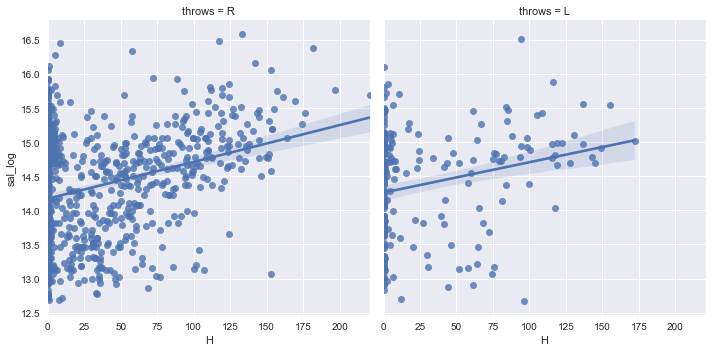

In [44]:
sns.lmplot(x='H',y='sal_log',data=df,col='throws')

Text(0.5, 1.0, 'Correlation Heatmap')

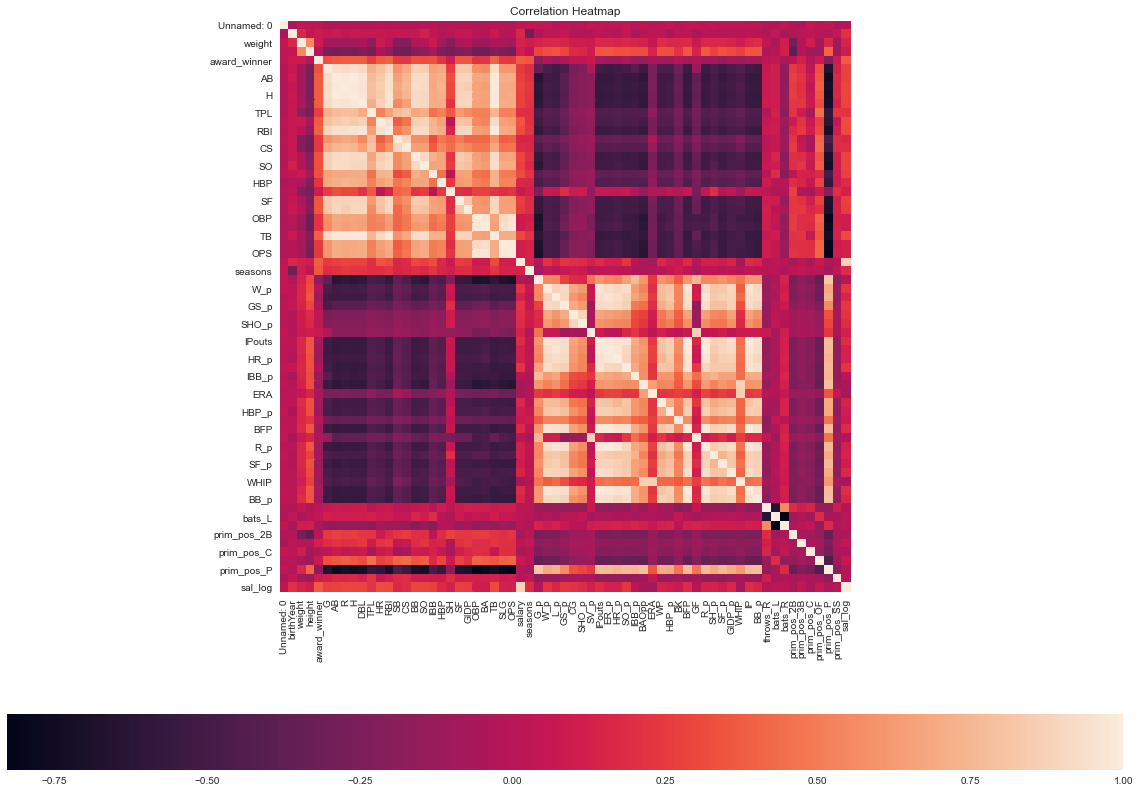

In [49]:
fig,ax = plt.subplots(figsize = (20,15))

sns.heatmap(df.corr(), cbar_kws= {'orientation': 'horizontal'} ,square=True)
plt.title("Correlation Heatmap")
#plt.savefig('PNG/hand_salary_dist.png', dpi=300, 
      #      bbox_inches= 'tight', padding_inches = 4, transparent = True )